<a href="https://colab.research.google.com/github/lakshay170/hotel_capstone/blob/master/Hotel_Capstone_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Bookings



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Presented by -** Lakshay Nandwani


# **Project Summary -**

1. **Business Problem**--Augment the hospitality business by

  1. examining the high cancellation rate,
  2. exploring new business opportunities,
  3. filling existing pitfalls


2. **About Dataset**-Given  a hotel transactions dataset in between time period of July 2015 to Aug 2017 comprising 1.2 lakh+ entries & 32 columns

3. **Handling NaNs** -
  1. Duplicate values -- 31K + rows were duplicate , all were dropped.
  2. Mainly 3 columns company ,agent, country had nan values. Company and agent columns were filled by NA as the booking might have been done by individuals themselves. Country columns was filled by mode.

4. **Outlier treatment** -- Following columns were suspected to have outliers

posssible_outliers =['lead_time','stays_in_weekend_nights','stays_in_week_nights','days_in_waiting_list','adr','adults','children','babies']


  1. **Lead time outlier treatment** --violin plot shows distribution of lead time is right skewed. But extreme points were not dropped, as in Europe people tend to plan their vacation even 6 months in advance.

  2. **ADR outliers treatment** -- one entry of ADR 5000 and -6 was dropped.1500+ rows had ADR 0 , it is assumed that it was a promotional discount.



5. **Data Wrangling** --

  1. Data of cancellations & non cancellations is segregated & then analysed in some scenarios.
  2. Converted the dtype of arrival_date to datetime
  2. Classified each day to weekend or weekday
  3. Calculated total revenue as ADR * num_of_days_stayed
  4. Categorised lead_time into bins--0-2 days,3-15 days,.....365+days


6. **Tops & Bottoms**--of each possible column like --
  1. top market segment
  2. top distribution channel
  3. top country from which bookings are coming
  4. top room type booked etc
  5. top meal ordered

  Suitable recoomendations were given along with it.

7. **Business Outlook** -- Month on month Yearly Trend of revenue and occupancy shows that hospitality business records a positive growth. But the rate of growth decreases in successive years.

8. **Analysis** --

  1. Bivariate and multivariate analysis of 'is_canceled' column was performed with following columns--

    1. Lead time --for lead time greater than 30 days cancellation increases to 30%

    2. Adr--has no effect on cancellations

    3. Deposit type--Non refundable deposits have 95% cancellation rate.It has not been able to stop cancellations  .Since non refundable bookings are also less in number ,it implies people hesitate to pay advance payments.
    4. Mkt segment --online TAs do bring business but are also cause of higher cancellations. Reduce their cancellation rate by incentivizing them by cashbacks , holiday packages etc


  2. Focus should be to increase customer retention as repeated guests were as low as 4%

  3. Occupancy and ADR of Week and weekday  rates is same
  4. Monthly occupancy trends --Dynamic Pricing in peak buisness seasons
  5. Heat map was also plotted, to find correlation between the columns and perform the analysis, if required.

  

# **GitHub Link -**

https://github.com/lakshay170/hotel_capstone.git

# **Problem Statement**


**Write Problem Statement Here.**

Examine the causes of high cancellations & suggest suitable measures.

Find the shortfalls,if any& recommend remedial measures

Find the untapped business opportunities.

#### **Define Your Business Objective?**

Augment the hospitality business


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset
hotel =pd.read_csv('Hotel Bookings.csv')



### Dataset First View

In [3]:
# Dataset First Look
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
hotel.shape

(119390, 32)

In [5]:
hotel.iloc[0]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  342
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    27
arrival_date_day_of_month                    1
stays_in_weekend_nights                      0
stays_in_week_nights                         0
adults                                       2
children                                   0.0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
assigned_room_type                           C
booking_chang

### Dataset Information

In [6]:
# Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
hotel.duplicated().sum()

31994

In [8]:
# Dropping duplicate columns.
# It is highly unlikely that all column entries of the records match, implying duplicates are present.
hotel=hotel.drop_duplicates()
hotel.shape

(87396, 32)

In [9]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

### Missing Values/Null Values  has 2 parts-- explicit nan & inconsistent or missing values

In [10]:
# Null Values Count -- explicit nan are recognised as .isna by pandas
# Inconsistent data is dealt few cells below

# Creating DataFrame of percentage null values.
null_values = pd.DataFrame({'null_values' :hotel.isna().sum(),\
                            'percent_null_values' : (hotel.isna().sum()) / (hotel.shape[0]) * (100)})

# Masking to obtain 'pct null values'>0
null_values[null_values['percent_null_values']>0]

,null_values,percent_null_values
children,4,0.004577
country,452,0.517186
agent,12193,13.951439
company,82137,93.982562


<Axes: >

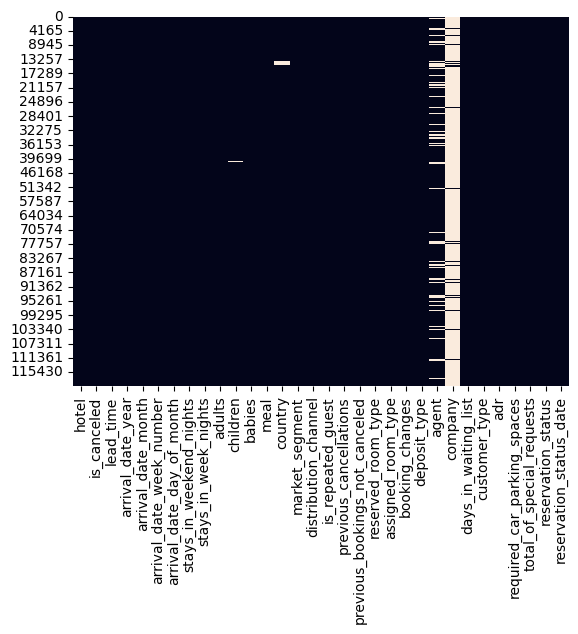

In [11]:
# Visualizing the missing values
sns.heatmap(hotel.isnull(), cbar=False)

# country, company ,agent has null values

In [12]:
# Dealing with NaN

# Incase of null values in agent & company columns, they can be replaced by NA (Not Applicable) as \
# the respective entry may not be applicable. Ex For a 'direct customer', company code is NA or \
# no agent was used


hotel['agent'].replace(np.nan,'NA',inplace=True)
hotel['company'].replace(np.nan,'NA',inplace=True)


In [13]:
# Finding value_counts() of country in desc order
print(hotel['country'].value_counts().sort_values(ascending=False))
mode_country=hotel['country'].mode()[0]     #to extract 'PRT' from Series



# Filling nan of country col by mode ,as difference in mode of country & 2nd most popular country is very high
# \=PRT (27453)- GBR(10433) & only 452 values need to be filled
hotel['country'].replace(np.nan,mode_country,inplace=True)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
SLE        1
AIA        1
ATF        1
SDN        1
KHM        1
Name: country, Length: 177, dtype: int64


###### Inconsistent data -- can be suspected by seeing whether each column has suitable dtype or not.


In [14]:
# Here reservation_status_date has object dtype , its dtype should be datetime
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [15]:
# Converting to datetime

# Using try-except block to raise exception if any value in the col is not in datetime format.

try:
    hotel['reservation_status_date']=pd.to_datetime(hotel['reservation_status_date'])
    print('Datetime conversion successful')

# This col may have inconsistent values like ?
except Exception as e:
    print(e)

Datetime conversion successful


In [16]:
# Creating 'arrival_date' col by concatenating day/month/year from respctive columns
hotel['arrival_date']=hotel['arrival_date_day_of_month'].astype('str')+hotel['arrival_date_month']+hotel['arrival_date_year'].astype('str')

# Converting newly created col to  datetime
hotel['arrival_date']=pd.to_datetime(hotel['arrival_date'])

# Creating new columns by extracting day name & day number
hotel['arrival_day_name']=hotel['arrival_date'].dt.day_name()
hotel['week_day']=hotel['arrival_date'].dt.weekday


# Extracting month & month name
hotel['arrival_month']=hotel['arrival_date'].dt.month
hotel['arrival_month_name']=hotel['arrival_date'].dt.month_name()


# Extracting year
hotel['year']=hotel['arrival_date'].dt.year

In [17]:
# 'week_day_classification' col created classifying a particular day as weekday or a weekend

labels=['week_day','weekend']
bins=[-1,4,6] #-1 to include 0 in bins
hotel['week_day_classification']=pd.cut(hotel['week_day'],bins=bins ,labels=labels)

In [18]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87392 non-null  float64       
 11  b

### What did you know about your dataset?

Given  a hotel transactions dataset in between time period of July 2015 to Aug 2017 comprising 1.2 lakh+ entries & 32 columns

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'arrival_day_name', 'week_day', 'arrival_month', 'arrival_month_name',
       'year', 'week_day_classification'],
      dtype='object')

In [20]:
# Dataset Describe
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,week_day,arrival_month,year
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,...,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567,2.979839,6.475663,2016.210296
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,...,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946,2.006724,3.097576,0.686102
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000,2015.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,1.000000,4.000000,2016.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000,3.000000,7.000000,2016.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000,5.000000,9.000000,2017.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,6.000000,12.000000,2017.000000


In [21]:
# From describe table ,min ADR can't be -6.38. Therefore dropping it
hotel[hotel['adr']<0]
hotel=hotel[hotel['adr']>=0]
hotel.shape

(87395, 39)

### Variables Description

hotel: type of hotel -Resort Hotel or City Hotel

is_canceled: A binary value (0 or 1) indicating whether the booking was canceled (0 for not canceled, 1 for canceled).

lead_time: The number of days between the booking date and the arrival date.

arrival_date_year: The year of the arrival date.

arrival_date_month: The month of the arrival date.

arrival_date_week_number: The week number of the arrival date.

arrival_date_day_of_month: The day of of the arrival date.

stays_in_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay


stays_in_week_nights: The number of weekday nights (Monday to Friday) the guest stayed.

adults: Number of adults

children: The number of children

babies: The number of infants

meal: Type of meal booked.
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)


country: The country of origin of the guest.

market_segment: The market segment categorizing the booking (e.g., Direct).

distribution_channel: The distribution channel through which the booking was made (e.g., Direct).
“TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest:0 for not repeated, 1 for repeated

previous_cancellations: The number of previous bookings that were canceled by the guest.

previous_bookings_not_canceled: The number of previous bookings that were not canceled by the guest.

reserved_room_type: The type of room that was originally reserved.Code

assigned_room_type: The type of room assigned to the guest at check-in.Code

booking_changes: 	Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

deposit_type: Indication on if the customer made a deposit to guarantee the booking.
This variable can assume three categories:
No Deposit – no deposit was made;
Non Refund – a deposit was made in the value of the total stay cost;
Refundable – a deposit was made with a value under the total cost of stay.

agent: The ID of the travel agent associated with the booking (if applicable).

company:	ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list: The number of days the booking was on the waiting list before confirmed.


customer_type:	Type of booking, assuming one of four categories:
1. Contract - when the booking has an allotment or other type of contract associated to it;
2. Group – when the booking is associated to a group;
3. Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
4. Transient-party – when the booking is transient, but is associated to at least other transient booking.


adr: The average daily rate, i.e., the average price per night.

required_car_parking_spaces: The number of car parking spaces required by the guest.

total_of_special_requests: The total number of special requests made by the guest.

reservation_status: Reservation last status, assuming one of three categories:
1. Canceled – booking was canceled by the customer;
2. Check-Out – customer has checked in but already departed;
3. No-Show – customer did not check-in and did inform the hotel of the reason why


reservation_status_date:	Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel. The date when the reservation status was last updated.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.

# Creating DF by passing zip object
nunique_df =pd.DataFrame(zip(hotel.columns,\
                             [hotel[col].nunique() for col in hotel.columns.tolist()]),\
                         columns=['Column name','nunique'])


nunique_df

,Column name,nunique
0,hotel,2
1,is_canceled,2
2,lead_time,479
3,arrival_date_year,3
4,arrival_date_month,12
5,arrival_date_week_number,53
6,arrival_date_day_of_month,31
7,stays_in_weekend_nights,17
8,stays_in_week_nights,35
9,adults,14


In [23]:
# Categorical Columns are generally the ones having dtype as object
# hotel.describe(include='object') displays categorical col

for col in hotel.describe(include='object'):  # iterating to display unique values of each categorical col
    if hotel[col].nunique()<180:     #to avoid displaying agent id & company id
        print(col)
        print(hotel[col].unique())
        print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

## Outlier Treatment

In [24]:
# Creating total stays col & calculating total nights stayed by adding weekday & weekend night stays
hotel['total_stays']=hotel['stays_in_weekend_nights']+hotel['stays_in_week_nights']

Axes(0.125,0.653529;0.227941x0.226471)
Axes(0.398529,0.653529;0.227941x0.226471)
Axes(0.672059,0.653529;0.227941x0.226471)
Axes(0.125,0.381765;0.227941x0.226471)
Axes(0.398529,0.381765;0.227941x0.226471)
Axes(0.672059,0.381765;0.227941x0.226471)


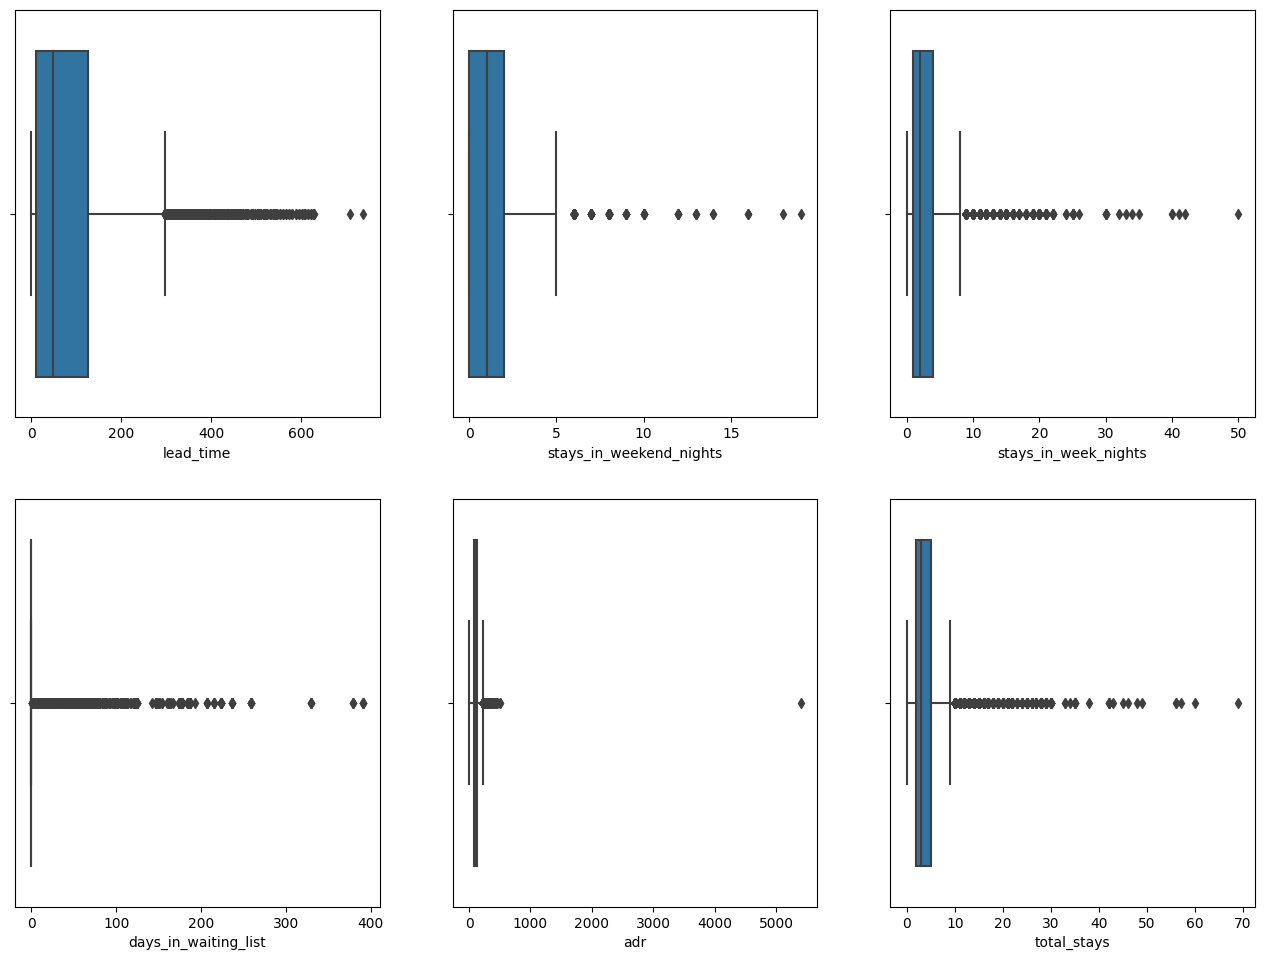

In [25]:
# Handpicking columns in which outliers may be present

posssible_outliers =['lead_time','stays_in_weekend_nights','stays_in_week_nights','days_in_waiting_list','adr','total_stays']
plt.figure(figsize=(16,18))
n=1
for col in posssible_outliers:
    plt.subplot(3,3,n)
    print(sns.boxplot(data=hotel,x=col))
    n+=1

# plt.savefig('outlier.jpg')
plt.show()


Text(0.5, 1.0, 'Lead_time violin plot')

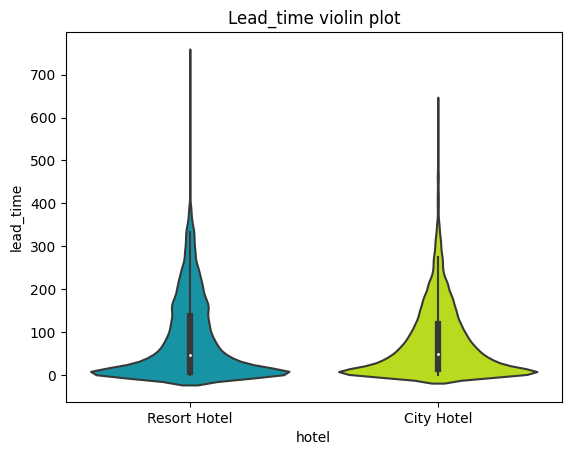

In [26]:
sns.violinplot(data=hotel,y='lead_time',x='hotel',palette='nipy_spectral')
plt.title("Lead_time violin plot")
# plt.savefig('Violinplot.jpg')
# In Europe , people plan their vaccation 6 months before.
# Later it is proved that higher the lead time greater are the chances of cancellation
# But nevertheless, 60 % of bookings done before 365 days are also realized.
# Therefore, such rows are not dropped.
# hotel=hotel[hotel['total_stays']<50]

Text(0.5, 1.0, 'ADR boxplot')

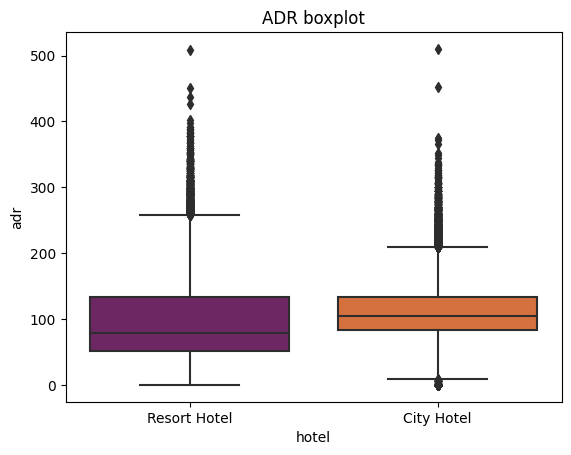

In [27]:
# 'adr' one outlier 5000.Dropping it

hotel=hotel[hotel['adr']<5000]

# Hotel type-wise ADR distribution
sns.boxplot(data=hotel,y='adr',x='hotel',palette='inferno')
plt.title('ADR boxplot')
# plt.savefig('adr_boxplot.jpg')

# Observation -- in City Hotel some points have adr =0
# ADR=0 is ASSUMED to be promotional discount


In [28]:
# In adult boxplot some points are at 0 , which is not possible as number of guests cant be equal to 0 .\
# Therefore,removing such entries

adult_0_filter=hotel['adults']==0
hotel=hotel[~adult_0_filter]      #Overwriting hotel by extracting rows where number of adults is not 0
hotel.shape

(87009, 40)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [29]:
# Write your code to make your dataset analysis ready.

# Creating total stays col & calculating total nights stayed by adding weekday & weekend night stays
hotel['total_stays']=hotel['stays_in_weekend_nights']+hotel['stays_in_week_nights']

# Revenue generated = ADR * Number of days stayed
hotel['revenue_per_trans'] = hotel['adr']* hotel['total_stays']


In [30]:
# Cancelled & not cancelled data entries will be analysed separately in some scenarios

# Masking
cancelled_df=hotel[hotel['is_canceled']==1]
not_cancelled_df=hotel[hotel['is_canceled']==0]

In [31]:
# Avg stay
avg_stay=not_cancelled_df['total_stays'].mean()
print(f'{round(avg_stay,1)} are the average nights stayed')

3.5 are the average nights stayed


## Tops & Bottoms -- Below few cells will depict 1st & last for various columns

<Axes: ylabel='hotel'>

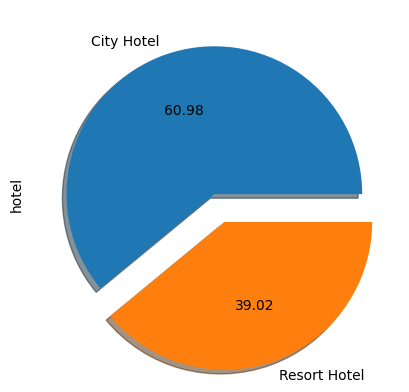

In [32]:
# Q Distribution of bookings bw hotels

hotel['hotel'].value_counts(normalize=True).plot(kind='pie',autopct="%.2f",explode=(0,0.2),shadow=True)

# Percentage booking in City hotel is more compared to Resort hotel.

# plt.savefig('hotel_distri_pie.jpg')


In [33]:
# Q From which country maximum bookings come?
import plotly.express as px

# Groupby country
country_visitors=hotel.groupby('country').size()
country_visitors=country_visitors.sort_values(ascending=False)

# Filtering those countries where guest count >2000
country_visitors=country_visitors[hotel['country'].value_counts()>2000]
country_visitors=country_visitors.reset_index(name = 'count')


# Making a geomap
px.choropleth(country_visitors,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale="Viridis_r",
                    title="Home country of visitors")
# plt.savefig('map.jpg')
# plt.show()

# maximum bookings come from PRT /Portugal ,followed by GBR Great Britain


In [34]:
country_visitors['Percentage_of_total_count']=country_visitors['count']/hotel.shape[0]*100
country_visitors

,country,count,Percentage_of_total_count
0,PRT,27758,31.902447
1,GBR,10408,11.961981
2,FRA,8798,10.111598
3,ESP,7230,8.309485
4,DEU,5372,6.174074
5,ITA,3052,3.507683
6,IRL,3011,3.460562
7,BEL,2065,2.373318


Overseas business could be harnessed by
1. Leveraging digital marketing.
2. Listing on local hotel booking apps of the overseas country


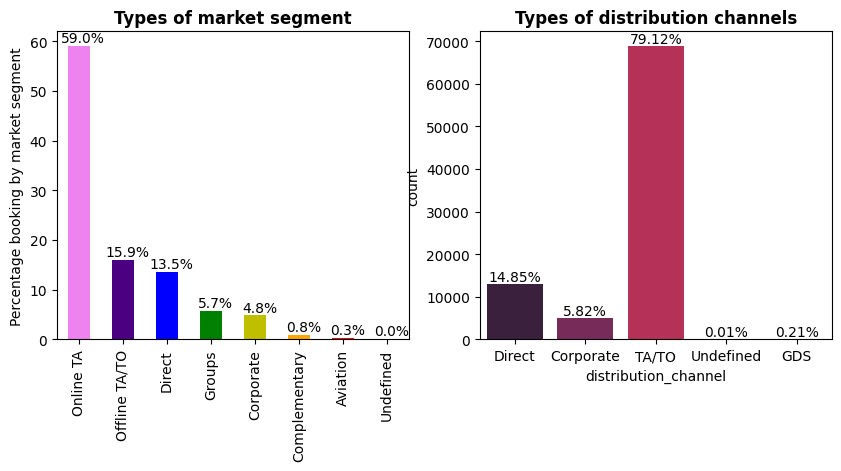

In [35]:
# Mkt segment & Distribution Channel Trend

plt.figure(figsize=(10,4))

# Mkt segment plot using pd
mkt_segment_percent=hotel['market_segment'].value_counts(normalize=True)*100
plt.subplot(1,2,1)
mkt_segment=mkt_segment_percent.plot(kind='bar',color=['violet','indigo','b','g','y','orange','r'])
plt.title('Types of market segment',fontweight="bold")
plt.ylabel("Percentage booking by market segment")

# Displaying the percentage values on the plot
for p in mkt_segment.patches:
      height = round(p.get_height(),1)
      mkt_segment.annotate(f'{height}%', (.1+p.get_x() + p.get_width() / 2., height+.2),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points'
              )


# Distribution Channel plot
plt.subplot(1,2,2)
plt.title('Types of distribution channels',fontweight="bold")
distri_channel=sns.countplot(data=hotel,x='distribution_channel',palette='rocket')

# Displaying the percentage values on the plot
for p in distri_channel.patches:
      height = p.get_height()

      # Dividing count of each distri channel by using df.shape[0] to obtain %
      distri_channel.annotate(f'{height/hotel.shape[0]*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points'
              )
# plt.savefig('top_mkt_distri.jpg')
plt.show()

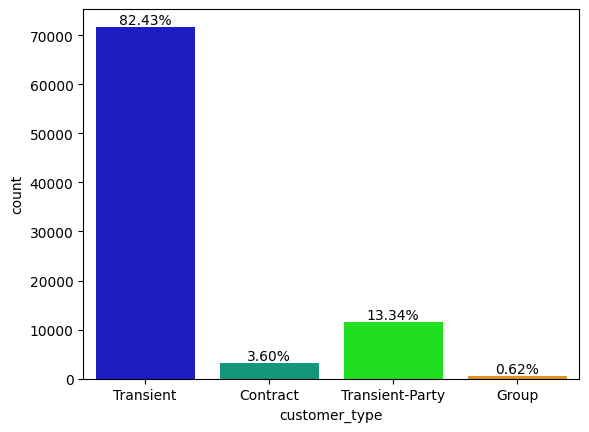

In [36]:
cust_type=sns.countplot(data=hotel ,x='customer_type',palette= 'nipy_spectral')

# Displaying the percentage values on the plot

for p in cust_type.patches:
      height = p.get_height()
      cust_type.annotate(f'{height/hotel.shape[0]*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points'
              )
# plt.savefig('customer_type.jpg')

In [37]:
not_cancelled_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

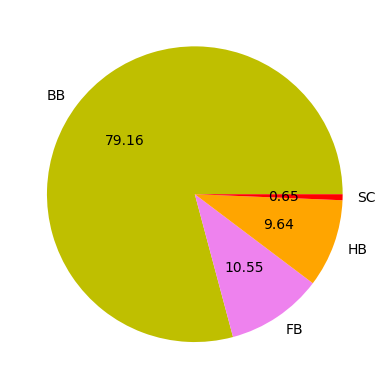

In [38]:
# Meal Pie chart
plt.pie(not_cancelled_df['meal'].value_counts()[:4],labels=not_cancelled_df['meal'].unique()[:4],\
        colors=['y','violet','orange','r'],autopct='%.2f')
plt.savefig('meal.jpg')
plt.show()


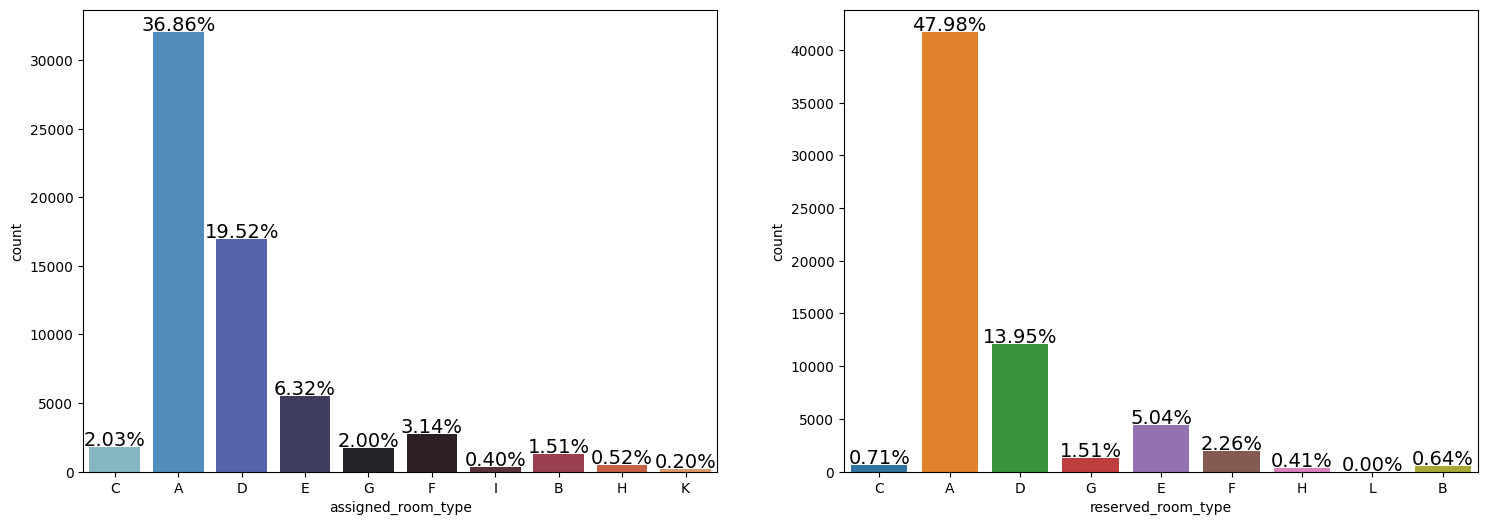

In [39]:
# Which room is booked most

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
assigned_room=sns.countplot(data=not_cancelled_df,x='assigned_room_type',palette='icefire')

# Displaying the percentage values on the plot
for p in assigned_room.patches:
      height = p.get_height()
      assigned_room.annotate(f'{height/hotel.shape[0]*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=14
              )


plt.subplot(1,2,2)
res_room=sns.countplot(data=not_cancelled_df,x='reserved_room_type')

# Displaying the percentage values on the plot
for p in res_room.patches:
      height = p.get_height()
      res_room.annotate(f'{height/hotel.shape[0]*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=14
              )

plt.show()

### What all manipulations have you done and insights you found?

From mkt segment plot
1. Incorporate Corporate & Aviation companies as customers, as their share in the mkt segment is less than 5% .Steps like -
  1. entering into half yearly contracts
  2. Corporate group trip stays
  3. employee family holiday packages etc

2. Maximum guests arrive from PRT.International market remains untapped
3. A is the most frequent booked room .
4. Meal is opted by 99% of customers which is good



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  -- Business Outlook Yearly Trends-- Revenue

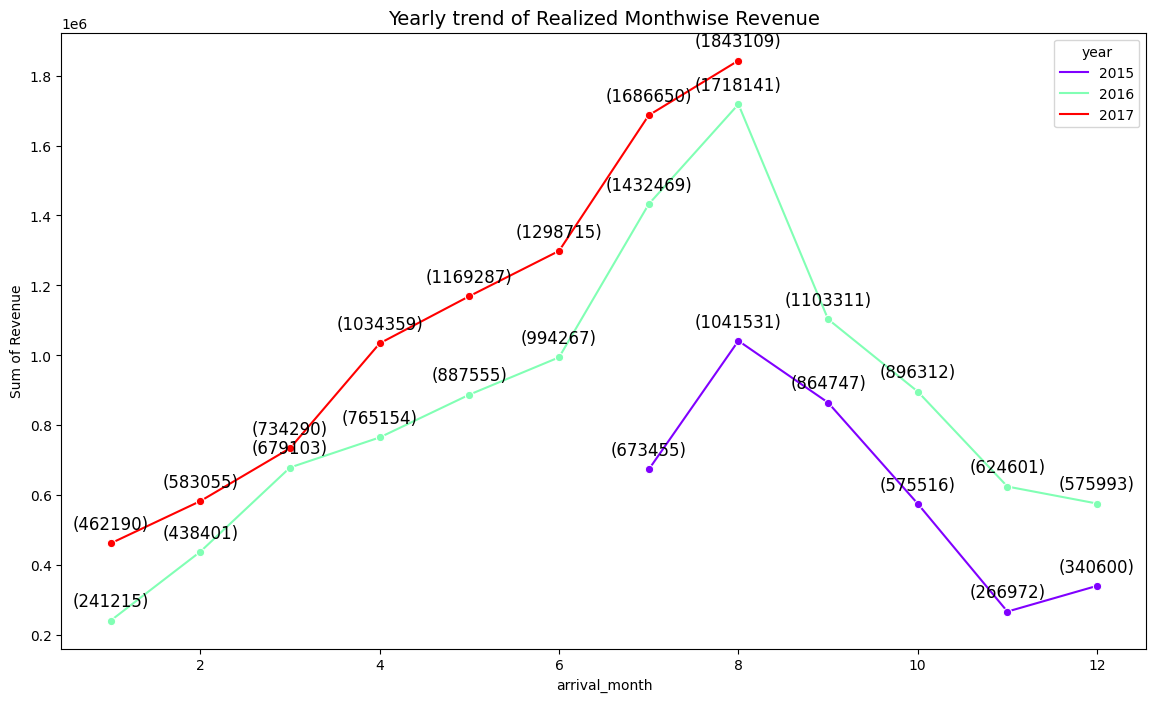

In [40]:
# Yearly trend of Realized Monthwise Revenue

#DF created by grouping  not cancelled data by year, month & carrying summation of revenue_per_trans
year_month_grp_adr_not_cancelled= not_cancelled_df.groupby(['year','arrival_month'])['revenue_per_trans'].sum().reset_index()
year_month_grp_adr_not_cancelled


# Lineplot
plt.figure(figsize=(14,8))
sns.lineplot(x='arrival_month',y='revenue_per_trans',data=year_month_grp_adr_not_cancelled,hue='year',palette='rainbow',\
            marker='o')
plt.title('Yearly trend of Realized Monthwise Revenue',fontsize=14)
plt.ylabel('Sum of Revenue')


# Printing respective values on the plot
x_0=year_month_grp_adr_not_cancelled['arrival_month']
y_0=year_month_grp_adr_not_cancelled['revenue_per_trans']
for i in range(len(x_0)):
    plt.annotate(f'({int(y_0[i])})', (x_0[i],y_0[i]),textcoords="offset points", \
                 xytext=(0,10),ha='center',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Line Chart best depicts yearly trend of month on month revenue .

##### 2. What is/are the insight(s) found from the chart?

1. Every successive year , revenue for a particular month increases viz a viz the same month last year.Ex Revenue of August 2015 < Aug 2016 < Aug 2017

2. For all the years , pattern of monthly booking follows the same path ie trend lines are parallel to each other with a peak in Aug

3. Revenue increase from 2016 to 2017 is less than rev increase from 2015 to 2016.Rate of year on year growth has slowed down ,though growth is positive

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Below steps (at end of analysis)can be taken to increase year on year growth rate

#### Chart - 2 -- Yearly Trends-- Occupancy

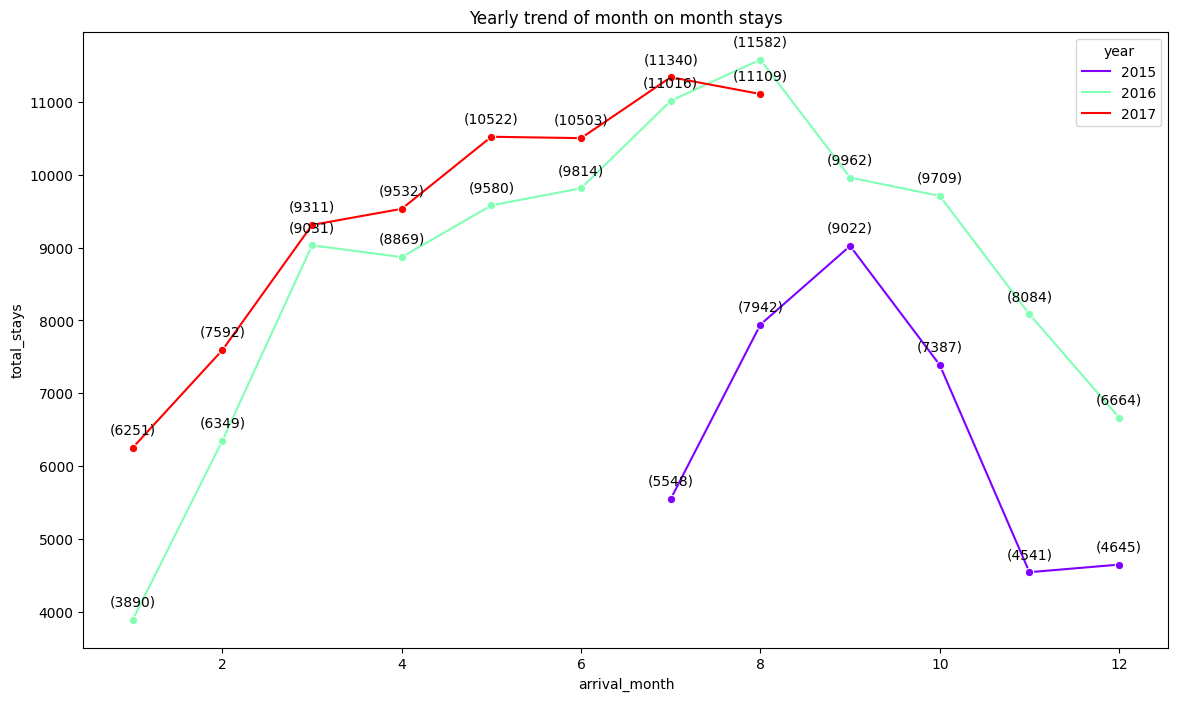

In [41]:
# Total stays yearwise

#DF created by grouping  not cancelled data by year, month & carrying summation of night stays.
total_stays_yearwise = not_cancelled_df.groupby(['year','arrival_month'])\
['total_stays'].sum().reset_index()


# Lineplot
plt.figure(figsize=(14,8))
sns.lineplot(data=total_stays_yearwise,x='arrival_month',y='total_stays'\
             ,hue='year',palette='rainbow',marker='o')
plt.title('Yearly trend of month on month stays')


# Printing respective values on the plot
x_b=total_stays_yearwise['arrival_month']
y_b=total_stays_yearwise['total_stays']

for i in range(len(x_b)):
    plt.annotate(f'({int(y_b[i])})', (x_b[i], y_b[i]), textcoords="offset points", xytext=(0,10),\
                 ha='center')

##### 1. Why did you pick the specific chart?

Line Chart best depicts yearly trend of month on month Occupancy .

##### 2. What is/are the insight(s) found from the chart?

1. Slight downfall in Occupancy in Aug 2017 viz 2016.Otherwise trend is positive

2. Occupancy drastically increased from 2015 to 2016.But the rate of growth slowed yet positive from 2016 to 2017

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Below steps (at end of analysis)can be taken to increase year on year growth rate

#### Chart - 3 -Comparison of monthwise Revenue-- potential,realised & lost in the given time period

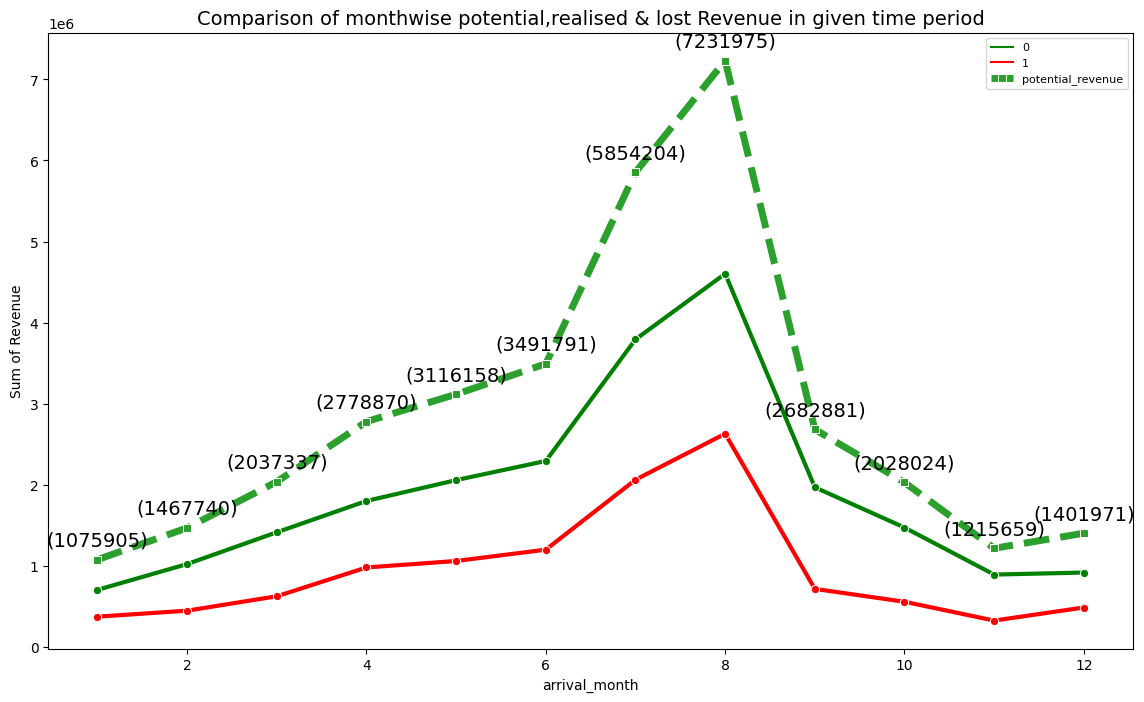

In [42]:
# Chart - 1 visualization code
plt.figure(figsize=(14,8))

# Grouping by month
revenue_df_month_is_cancelled =hotel.groupby(['arrival_month','is_canceled'])['revenue_per_trans'].sum().reset_index()
revenue_df_month =hotel.groupby(['arrival_month'])['revenue_per_trans'].sum().reset_index()


# Plotting data
sns.lineplot(data=revenue_df_month_is_cancelled,x='arrival_month',y='revenue_per_trans',\
             hue='is_canceled', marker='o',linewidth=3,palette=['g','r'])

sns.lineplot(data=revenue_df_month,x='arrival_month',y='revenue_per_trans',marker='s',\
             linestyle='dashed',linewidth=5,label='potential_revenue')
plt.ylabel('Sum of Revenue')



# Printing respective values on the plot
x_11=revenue_df_month['arrival_month']
y_11=revenue_df_month['revenue_per_trans']
for i in range(len(x_11)):
    plt.annotate(f'({int(y_11[i])})', (x_11[i],y_11[i]),textcoords="offset points", \
                 xytext=(0,10),ha='center',fontsize=14)


# Plot formatting
plt.legend(fontsize=8)
plt.title('Comparison of monthwise potential,realised & lost Revenue in given time period',fontsize=14)
# plt.savefig('Comparison of monthwise potential,realised & lost Revenue.jpg')
plt.show()

##### 1. Why did you pick the specific chart?

Line chart can compare monthwise

 1. sum of realised average daily rate (ADR),

 2. loss of ADR due to cancellations

 3. and potential ADR if ADR of cancellationswas also realised

##### 2. What is/are the insight(s) found from the chart?

In [43]:
# Calculating sum of respective ADRs

# Summation of revenue_per_trans of cancelled bookings
lost_rev=revenue_df_month_is_cancelled[revenue_df_month_is_cancelled['is_canceled']==1]['revenue_per_trans'].sum()

# Summation of revenue_per_trans of all bookings
potential_rev=revenue_df_month_is_cancelled['revenue_per_trans'].sum()

# % loss
print(f'{int(lost_rev/potential_rev*100)}% Revenue loss incurred due to cancellations in given time period ')
print(f'{lost_rev} Euros is the revenue lost in absolute terms in the given time pd')

33% Revenue loss incurred due to cancellations in given time period 
11451509.02 Euros is the revenue lost in absolute terms in the given time pd


33% Reevenue loss incurred due to cancellations in given time period.
1,14,51,509 Euros is the revenue lost in absolute terms in the given time pd

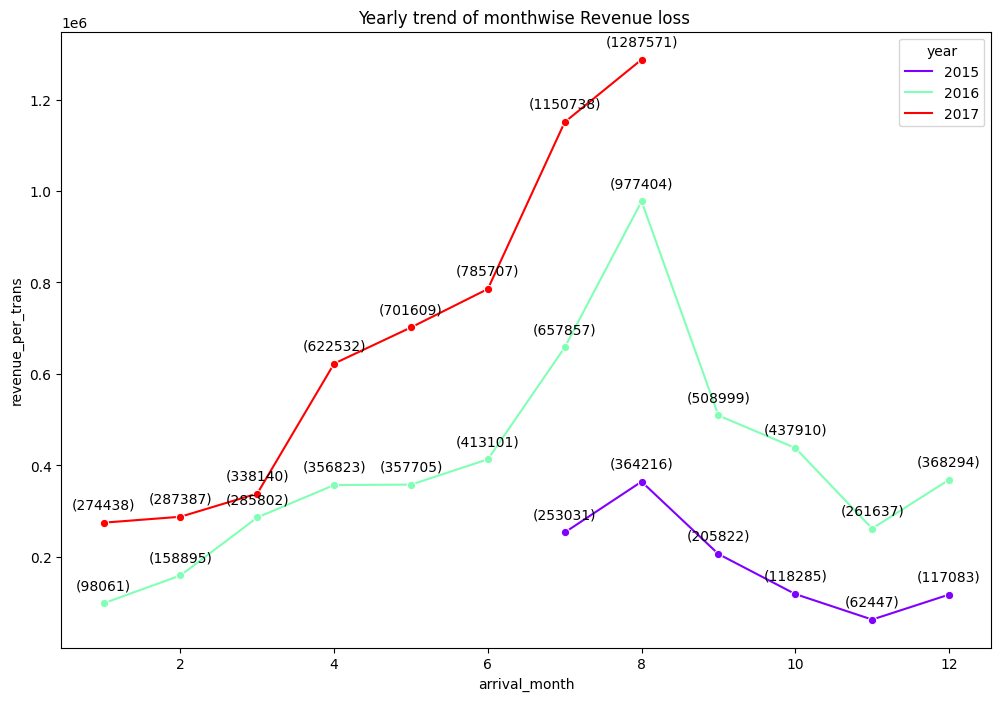

In [44]:
#DF created by grouping cancelled data by year, month & carrying summation of revenue_per_trans
year_month_grp_adr_cancelled= cancelled_df.groupby(['year','arrival_month'])\
['revenue_per_trans'].sum().reset_index()

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=year_month_grp_adr_cancelled,x='arrival_month',y='revenue_per_trans',\
             hue='year',palette='rainbow',marker='o')


# Printing values on the plot
x_12=year_month_grp_adr_cancelled['arrival_month']
y_12=year_month_grp_adr_cancelled['revenue_per_trans']
for i in range(len(x_12)):
    plt.annotate(f'({int(y_12[i])})', (x_12[i], y_12[i]), textcoords="offset points", xytext=(0,10),\
                 ha='center')

# Set labels and title
plt.title('Yearly trend of monthwise Revenue loss ')
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 33% loss in ADR & year on year increasing loss due to cancellation requires a deep analysis, to suggest corrective measures


#### Chart - 4 -- Yearly Trends-- Cancellations

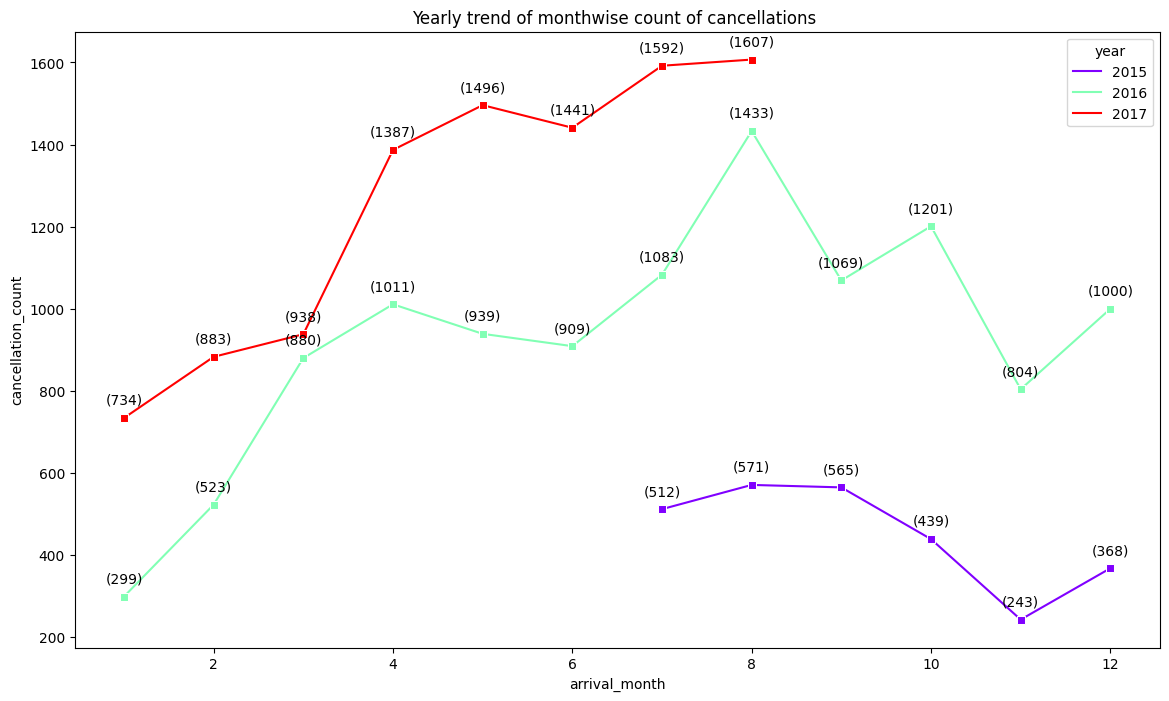

In [45]:
# DF created by grouping cancelled data by year , month & carrying out summation of cancellations
cancelled_count_yearwise = cancelled_df.groupby(['year','arrival_month'])\
['is_canceled'].count().reset_index(name='cancellation_count')
cancelled_count_yearwise

# Lineplot
plt.figure(figsize=(14,8))
sns.lineplot(data=cancelled_count_yearwise,x='arrival_month',y='cancellation_count'\
             ,hue='year',palette='rainbow',marker='s')
plt.title("Yearly trend of monthwise count of cancellations ")


# Plotting respective values on the plot
x_a=cancelled_count_yearwise['arrival_month']
y_a=cancelled_count_yearwise['cancellation_count']

for i in range(len(x_a)):
    plt.annotate(f'({int(y_a[i])})', (x_a[i], y_a[i]), textcoords="offset points", xytext=(0,10),\
                 ha='center')
# plt.savefig('cancellation count.jpg')
plt.show()

##### 1. Why did you pick the specific chart?

Line Chart best depicts yearly trend of month on month cancellations

##### 2. What is/are the insight(s) found from the chart?

Roughly 500 cancellations increase in a particular month , if compared in successive years.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Below steps (at end of analysis)can be taken to increase year on year growth rate

#### Chart - 5 -- Cumulative Monthly cancellations

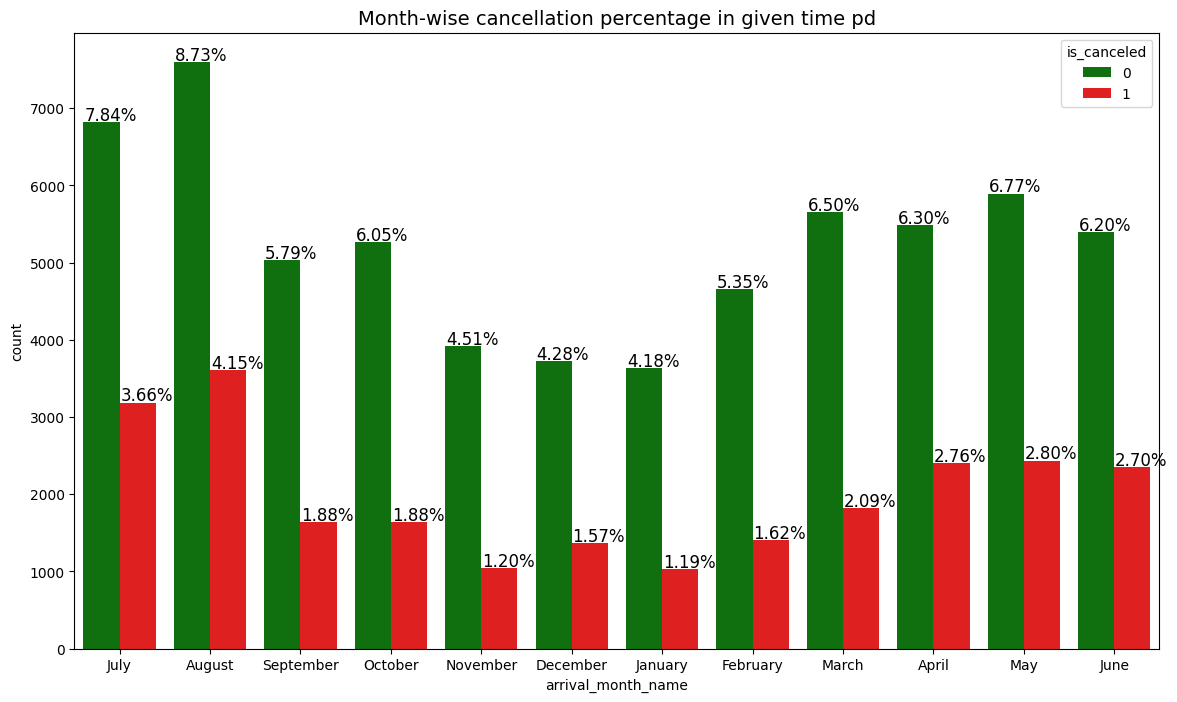

In [46]:

plt.figure(figsize=(14,8))
hotel['month'] = hotel['reservation_status_date'].dt.month

mnt_bookings=sns.countplot(data=hotel,x='arrival_month_name',hue='is_canceled',palette=['g','r'])
# plt.savefig('monthwise_cancellations.jpg')

for p in mnt_bookings.patches:
      height = p.get_height()
      mnt_bookings.annotate(f'{height/hotel.shape[0]*100:.2f}%', (0.1+p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=12
              )
plt.title('Month-wise cancellation percentage in given time pd',fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

Grouped Bar Chart best depicts cumulative cancellations trend of a particular month in the given time period

##### 2. What is/are the insight(s) found from the chart?

In [47]:
mnt_cncl = pd.crosstab(hotel['arrival_month_name'],hotel['is_canceled'],normalize=True)*100
# normalize='index'--to calculate percentage over each row
print(mnt_cncl,'\n')

# Finding max cancellation month
mnt_cncl[mnt_cncl[1]==max(mnt_cncl[1])]

is_canceled                0         1
arrival_month_name                    
April               6.299348  2.756037
August              8.733579  4.150145
December            4.276569  1.572251
February            5.354618  1.615925
January             4.176579  1.187234
July                7.842867  3.662839
June                6.200508  2.700870
March               6.497029  2.089439
May                 6.774012  2.798561
November            4.505281  1.203324
October             6.051098  1.884862
September           5.789056  1.877967 



is_canceled,0,1
arrival_month_name,,
August,8.733579,4.150145


In [48]:
# Finding min bookings month
mnt_cncl[mnt_cncl[0]==min(mnt_cncl[0])]

is_canceled,0,1
arrival_month_name,,
January,4.176579,1.187234


1. August has highest cancellations as well as highest bookings
2. Jan has lowest non cancelled bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Discounts can be given in Jan & other low booking months to increase occupancy.
2. Prices can be increased in Aug ,July

#### Chart - 6 --Hotel_typewise Cancellation Trends  


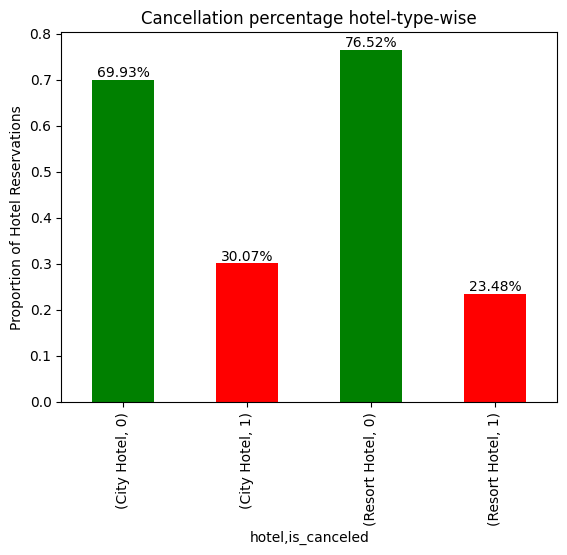

In [49]:
# Cancellations hoteltypewise

# Grouping by hotel
plot_2=hotel.groupby(by='hotel')['is_canceled'].value_counts(normalize=True)\
.plot(kind='bar',color=['g','r'])


# For printing percentages on the chart
for p in plot_2.patches:
      height = p.get_height()
      plot_2.annotate(f'{height*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points'
              )


plt.ylabel('Proportion of Hotel Reservations')
# plt.savefig('hoteltypewise cancellations.jpg')
plt.title('Cancellation percentage hotel-type-wise')
plt.show()


##### 1. Why did you pick the specific chart?

Grouped Bar chart can best depict all 4 combinations of 2 hotel types & 2 is_canceled.

##### 2. What is/are the insight(s) found from the chart?

In [50]:
# Higher cancellation percentage in City Hotel
pd.crosstab(hotel['is_canceled'],hotel['hotel'],normalize='columns')*100

hotel,City Hotel,Resort Hotel
is_canceled,,
0,69.930637,76.515977
1,30.069363,23.484023


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. City hotel has 30% cancellations.Higher cancellations because city hotel has more bookings than Resort
2. 15% can be considered normal.More than 15% is a loss to hotel in terms of lost opportunity cost due to less occupancy

#### Chart - 7 -Countrywise cancellations

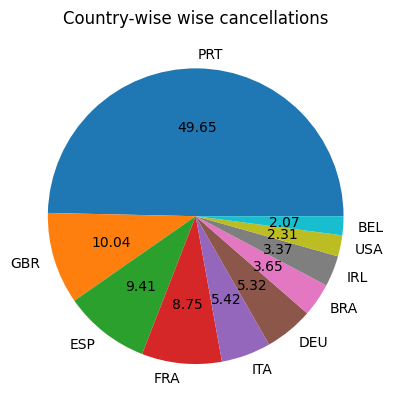

In [51]:
# Finding guests from which country cancel more often.
top_10_country_canceled = cancelled_df['country'].value_counts()[:10]

# Plotting pie of (top_10_country_canceled)
plt.pie(top_10_country_canceled,labels=top_10_country_canceled.index,autopct='%.2f')
plt.title('Country-wise wise cancellations',fontsize=12)
# plt.savefig('countrywise_cancellations.jpg')
plt.show()



##### 1. Why did you pick the specific chart?

Pie chart depicts distribution of countrywise cancellations.

##### 2. What is/are the insight(s) found from the chart?

PRT ie Portugal country's guests has the highest proportion of cancellations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the hotel is located in PRT , maximum bookings & cancellations come from there . Market share of other countries is less.Therefore , there is untapped overseas business potential.  

#### Chart - 8 -- Lead_time vs Cancellations

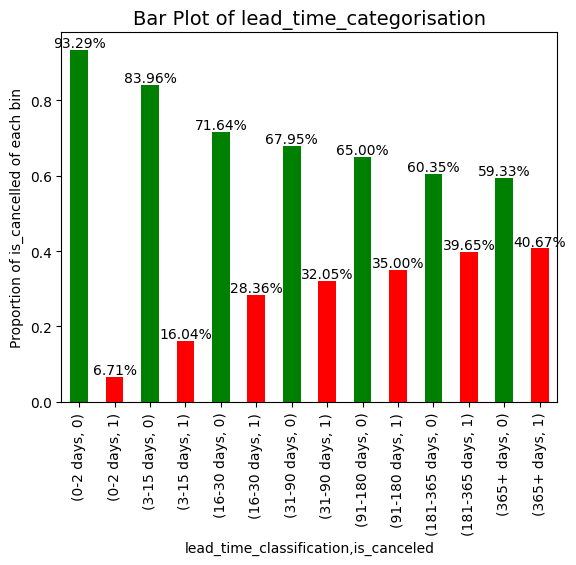

In [52]:
# Categorising lead_time in a new col
lead_time_labels=['0-2 days','3-15 days','16-30 days','31-90 days','91-180 days','181-365 days','365+ days']
lead_time_bins=[-1,2,15,30,90,180,365,float('inf')]
hotel['lead_time_classification']=pd.cut(hotel['lead_time'],bins=lead_time_bins,labels=lead_time_labels)

# Bar Plot of lead_time_categorisation
plot_lead_time =hotel.groupby('lead_time_classification')['is_canceled'].value_counts(normalize=True)\
.plot(kind='bar',color=['g','r'])
plt.title('Bar Plot of lead_time_categorisation',fontsize=14)
plt.ylabel("Proportion of is_cancelled of each bin")


# Calculating & printing % on the plot
for p in plot_lead_time.patches:
      height = p.get_height()
      plot_lead_time.annotate(f'{height*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points' )
# plt.savefig('Lead_time vs Cancellations.jpg')
plt.show()


##### 1. Why did you pick the specific chart?


Grouped bar chart best highlights the percentage of cancellations for each category of lead_time column.

##### 2. What is/are the insight(s) found from the chart?


In [53]:
pd.crosstab(hotel['lead_time_classification'],hotel['is_canceled'],normalize='index')*100

is_canceled,0,1
lead_time_classification,,
0-2 days,93.294619,6.705381
3-15 days,83.961525,16.038475
16-30 days,71.640683,28.359317
31-90 days,67.954997,32.045003
91-180 days,64.997248,35.002752
181-365 days,60.354125,39.645875
365+ days,59.325044,40.674956


1. As the lead time increases, the cancellation percentage also increases.
2. For lead time greater than 30 days cancellation is greater than 30%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


1.Disable advance booking of more than 15 days.

#### Chart - 9 --KDE of ADR

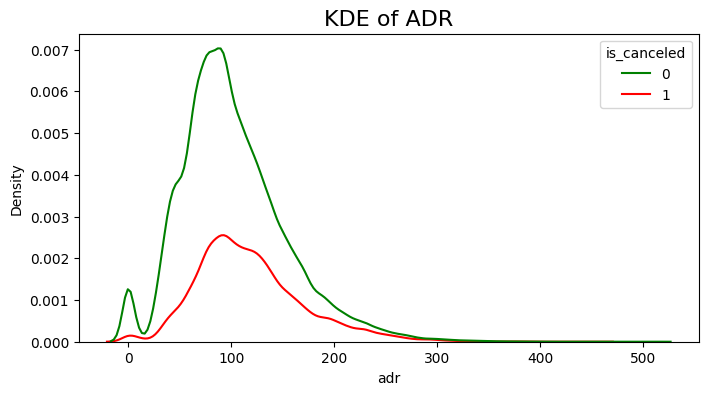

In [54]:
# Chart - 4 visualization code

# Hypothesis-- High ADR(price) leads to increased cancellations.
plt.figure(figsize=(8,4))
sns.kdeplot(data=hotel,hue='is_canceled',x='adr',palette=['green','red'])
plt.title("KDE of ADR",fontsize=16)
# plt.savefig('KDE of ADR.png')
plt.show()


# From plot
# ADR has no effect on cancellations
# Both green and red plot have highest probability density near adr 100.
# When ADR is 0 ,then also there are cancellations

##### 1. Why did you pick the specific chart?

Kernel Density Estimation shows probability distribution at various ADRs for both cancelled & not cancelled

##### 2. What is/are the insight(s) found from the chart?

1. Contrary to hypothesis ,ADR has no effect on cancellations
2. Both green and red lines have highest probability density near adr 100.
3. When ADR is 0 ,then also there are cancellations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Our prices are competitive

#### Chart - 10- Deposit_type vs Cancellations

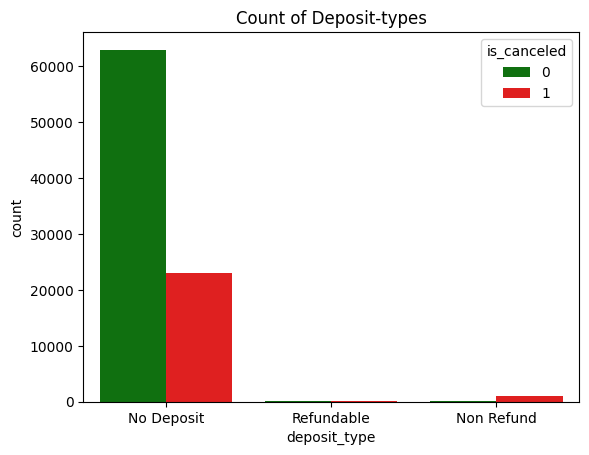

In [55]:
# Chart - 5 visualization code

# Hypothesis--Lower cancellation rates  in case of non refundable advance bookings.

deposit_type=sns.countplot(data=hotel,x='deposit_type',hue='is_canceled',palette=['green','red'])
plt.title("Count of Deposit-types")

plt.savefig('Count of Deposit-types.png')
plt.show()


##### 1. Why did you pick the specific chart?

Grouped bar chart best highlights the percentage of cancellations for each category of deposit_type

##### 2. What is/are the insight(s) found from the chart?

In [56]:
hotel.groupby(['deposit_type'])['is_canceled'].value_counts(normalize=True)*100

deposit_type  is_canceled
No Deposit    0              73.308100
              1              26.691900
Non Refund    1              94.696239
              0               5.303761
Refundable    0              75.700935
              1              24.299065
Name: is_canceled, dtype: float64

1. A no deposit & refundable booking type has approx 25% chance of cancellation
2. In cases when the advance is non-refundable only 95% cancellations were observed,which is contrary to the hypothesis. But non-refundable bookings are less in number in absolute terms

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Non refundable deposits have not been able to stop cancellations.Since non refundable bookings are less in number it implies people hesitate to pay advance payments.Non refundable advance bookings can be done away with.

#### Chart - 11 Mkt Segmentwise Cancellations

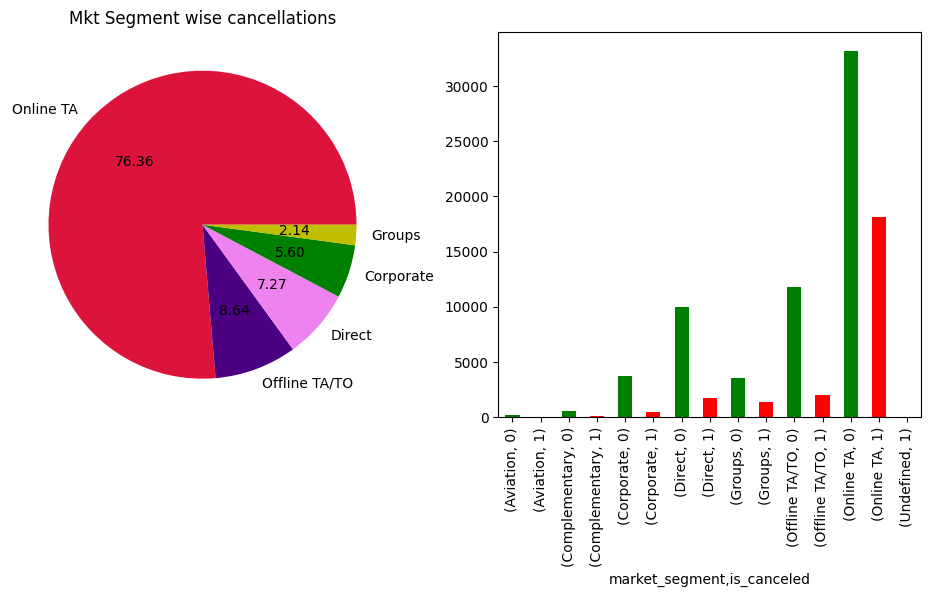

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(x=cancelled_df['market_segment'].value_counts()[:5],\
        labels=cancelled_df['market_segment'].unique()[:5],\
        colors=['crimson','indigo','violet','g','y','orange','r'],autopct='%.2f')
# cancelled_df['market_segment'].value_counts()[:5].plot(kind='pie')
plt.title('Mkt Segment wise cancellations')

# Online TAs

plt.subplot(1,2,2)

hotel.groupby('market_segment')['is_canceled'].value_counts().plot(kind='bar',color=['g','r'])
# plt.savefig('market_segment_cancellations.jpg')

plt.show()


##### 1. Why did you pick the specific chart?

1. Pie chart shows distribution of total cancellations
2.Bar plot shows cancellations & bookings in absolute terms.

##### 2. What is/are the insight(s) found from the chart?

In [58]:
pd.crosstab(hotel['market_segment'],hotel['is_canceled'],normalize='index')[:7]*100

is_canceled,0,1
market_segment,,
Aviation,80.088496,19.911504
Complementary,87.790698,12.209302
Corporate,87.880952,12.119048
Direct,85.277849,14.722151
Groups,72.932331,27.067669
Offline TA/TO,85.163526,14.836474
Online TA,64.629161,35.370839


From crosstab table
1. Online TAs -- For every 100 tickets booked by online TAs ,35 are cancelled.But, they outperform in bringing business with more than 30k non-cancelled tickets

2.Groups -- For every 100 tickets booked by Groups ,27 are cancelled.
3. For rest cancellations are within 15% threshold.

From Mkt Segment wise cancellations plot
1. From pie chart, out of total cancellations ,75% come from Online TAs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Overbook the rooms using a suitable model

<Axes: xlabel='count', ylabel='customer_type'>

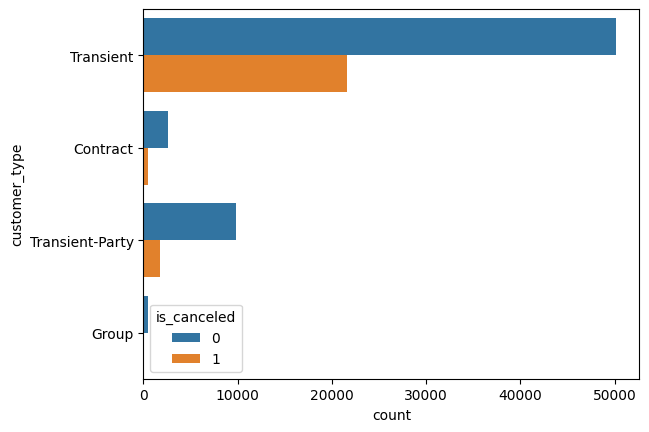

In [59]:
# Chart - 6 visualization code
sns.countplot(data=hotel,y='customer_type',hue='is_canceled')

#### Chart - 12 --Repeated Guests

<Axes: ylabel='is_repeated_guest'>

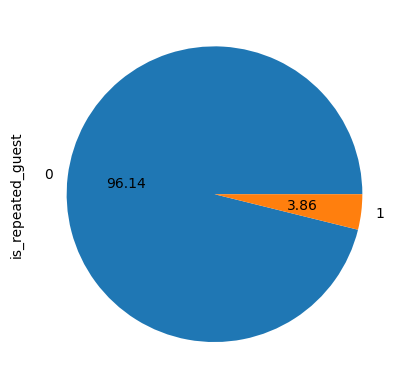

In [60]:
# Chart - 10 visualization code
hotel['is_repeated_guest'].value_counts().plot(kind='pie',autopct='%.2f')
# plt.savefig('is_repeated.jpg')

#

##### 1. Why did you pick the specific chart?

Pie chart depicts composition of repeated guests

##### 2. What is/are the insight(s) found from the chart?

Low customer repeatibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Get a feedback form filled-- Find possible reasons of low repeatibility .Work on those suggestions.
2. Start loyalty cards scheme , discount on subsequebt visits.
3. Need to focus on customer retention as it is more economical than customer acquisition.

#### Chart - 13 - Monthly percentage arrival

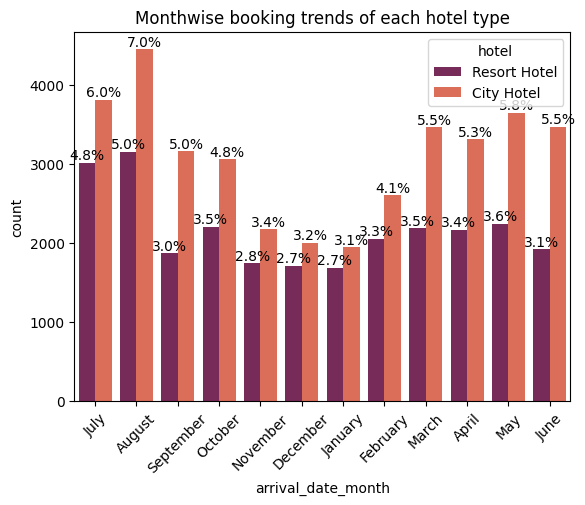

In [61]:
# Chart - 13 visualization code
month_occ=sns.countplot(data= not_cancelled_df,x='arrival_date_month',hue='hotel',palette='rocket')
plt.title('Monthwise booking trends of each hotel type')
plt.xticks(rotation=45)
# plt.savefig('month_occ.jpg')

for p in month_occ.patches:
    ht=p.get_height()

#     dividng height of patch by shape[0] of not_cancelled_df
    month_occ.annotate(f'{ht/not_cancelled_df.shape[0]*100:.1f}%', (p.get_x() + p.get_width() / 2, ht),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points')




##### 1. Why did you pick the specific chart?

Countplot shows monthwise booking trends of each hotel type

##### 2. What is/are the insight(s) found from the chart?

In [62]:
monthwise_guests_arrival=not_cancelled_df['arrival_date_month'].value_counts(normalize=True).reset_index()
monthwise_guests_arrival.columns=['month','percentage arrival']
monthwise_guests_arrival['percentage arrival']=monthwise_guests_arrival['percentage arrival']*100
monthwise_guests_arrival


,month,percentage arrival
0,August,12.046226
1,July,10.817666
2,May,9.343394
3,March,8.961352
4,April,8.688691
5,June,8.552360
6,October,8.346279
7,September,7.984845
8,February,7.385625
9,November,6.214134


Dec, Jan are the lean business season

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Discounts can be given in Jan & other low booking months to increase occupancy.
2. Dynamic  Pricing  can be introduced  in peak booking months Aug ,July

#### Chart - 14 -- Weekend &weekday occupancy

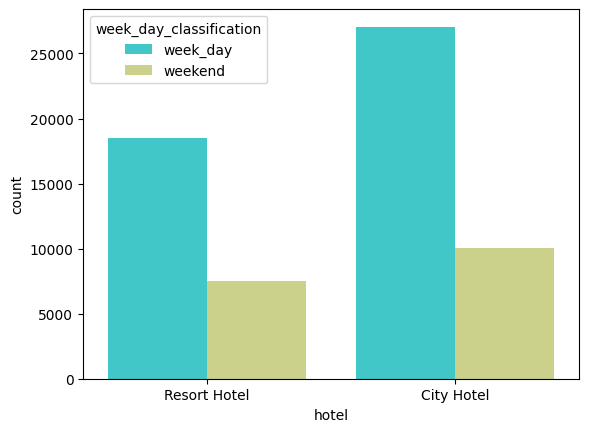

In [63]:
# Chart - 14 visualization code
# Hypothesis higher booking percentage & adr on weekdays


week_plot=sns.countplot(data=not_cancelled_df,hue='week_day_classification',x='hotel',palette='rainbow')
# for p in week_plot.patches:
#     ht= p.get_height()
#     week_plot.annotate(f'{ht/not_cancelled_df.shape[0]*100:.1f}%'\
#                       ,(p.get_x()+p.get_width()/2,ht),\
#                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# plt.savefig('week.jpg')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [64]:
pd.crosstab(not_cancelled_df['hotel'],not_cancelled_df['week_day_classification'],normalize='index')*100


week_day_classification,week_day,weekend
hotel,,
City Hotel,72.927953,27.072047
Resort Hotel,71.217428,28.782572


In [65]:
adr_week=not_cancelled_df.groupby(['week_day_classification'])['adr'].sum()

print('\n\n')
print('adr per day in weekdays:',adr_week[0]/5)
print('adr per day on weekends:',adr_week[1]/2)




adr per day in weekdays: 924737.908
adr per day on weekends: 913780.41


1. 72% bookings happen in 5 weekdays implying 14.2 % per day( 72/5) in both hotel types
2. 28% bookings happen on weekend ie 2 days14% per day
3. Same booking percentage each day for both the hotels.
4. Same ADR per day for both week days & weekend days

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Correlation Heatmap

In [66]:

col=[ 'is_canceled', 'lead_time', 'total_stays', 'adults','is_repeated_guest','days_in_waiting_list','adr',
  'reservation_status_date', 'arrival_date']
corr = hotel[col].corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,is_canceled,lead_time,total_stays,adults,is_repeated_guest,days_in_waiting_list,adr
is_canceled,1.00,0.18,0.09,0.08,-0.09,0.00,0.13
lead_time,0.18,1.00,0.32,0.14,-0.15,0.13,0.02
total_stays,0.09,0.32,1.00,0.11,-0.12,-0.01,0.06
adults,0.08,0.14,0.11,1.00,-0.17,-0.02,0.26
is_repeated_guest,-0.09,-0.15,-0.12,-0.17,1.00,-0.01,-0.16
days_in_waiting_list,0.00,0.13,-0.01,-0.02,-0.01,1.00,-0.03
adr,0.13,0.02,0.06,0.26,-0.16,-0.03,1.00


##### 1. Why did you pick the specific chart?

Heatmap quantifies correlation bw 2 variables


##### 2. What is/are the insight(s) found from the chart?

High correlation variables like

1. lead_time with is_cancelled
2. adr vs is_cancelled
3. lead_time vs total stays was analysed above

#### Chart - 16 - Pair Plot

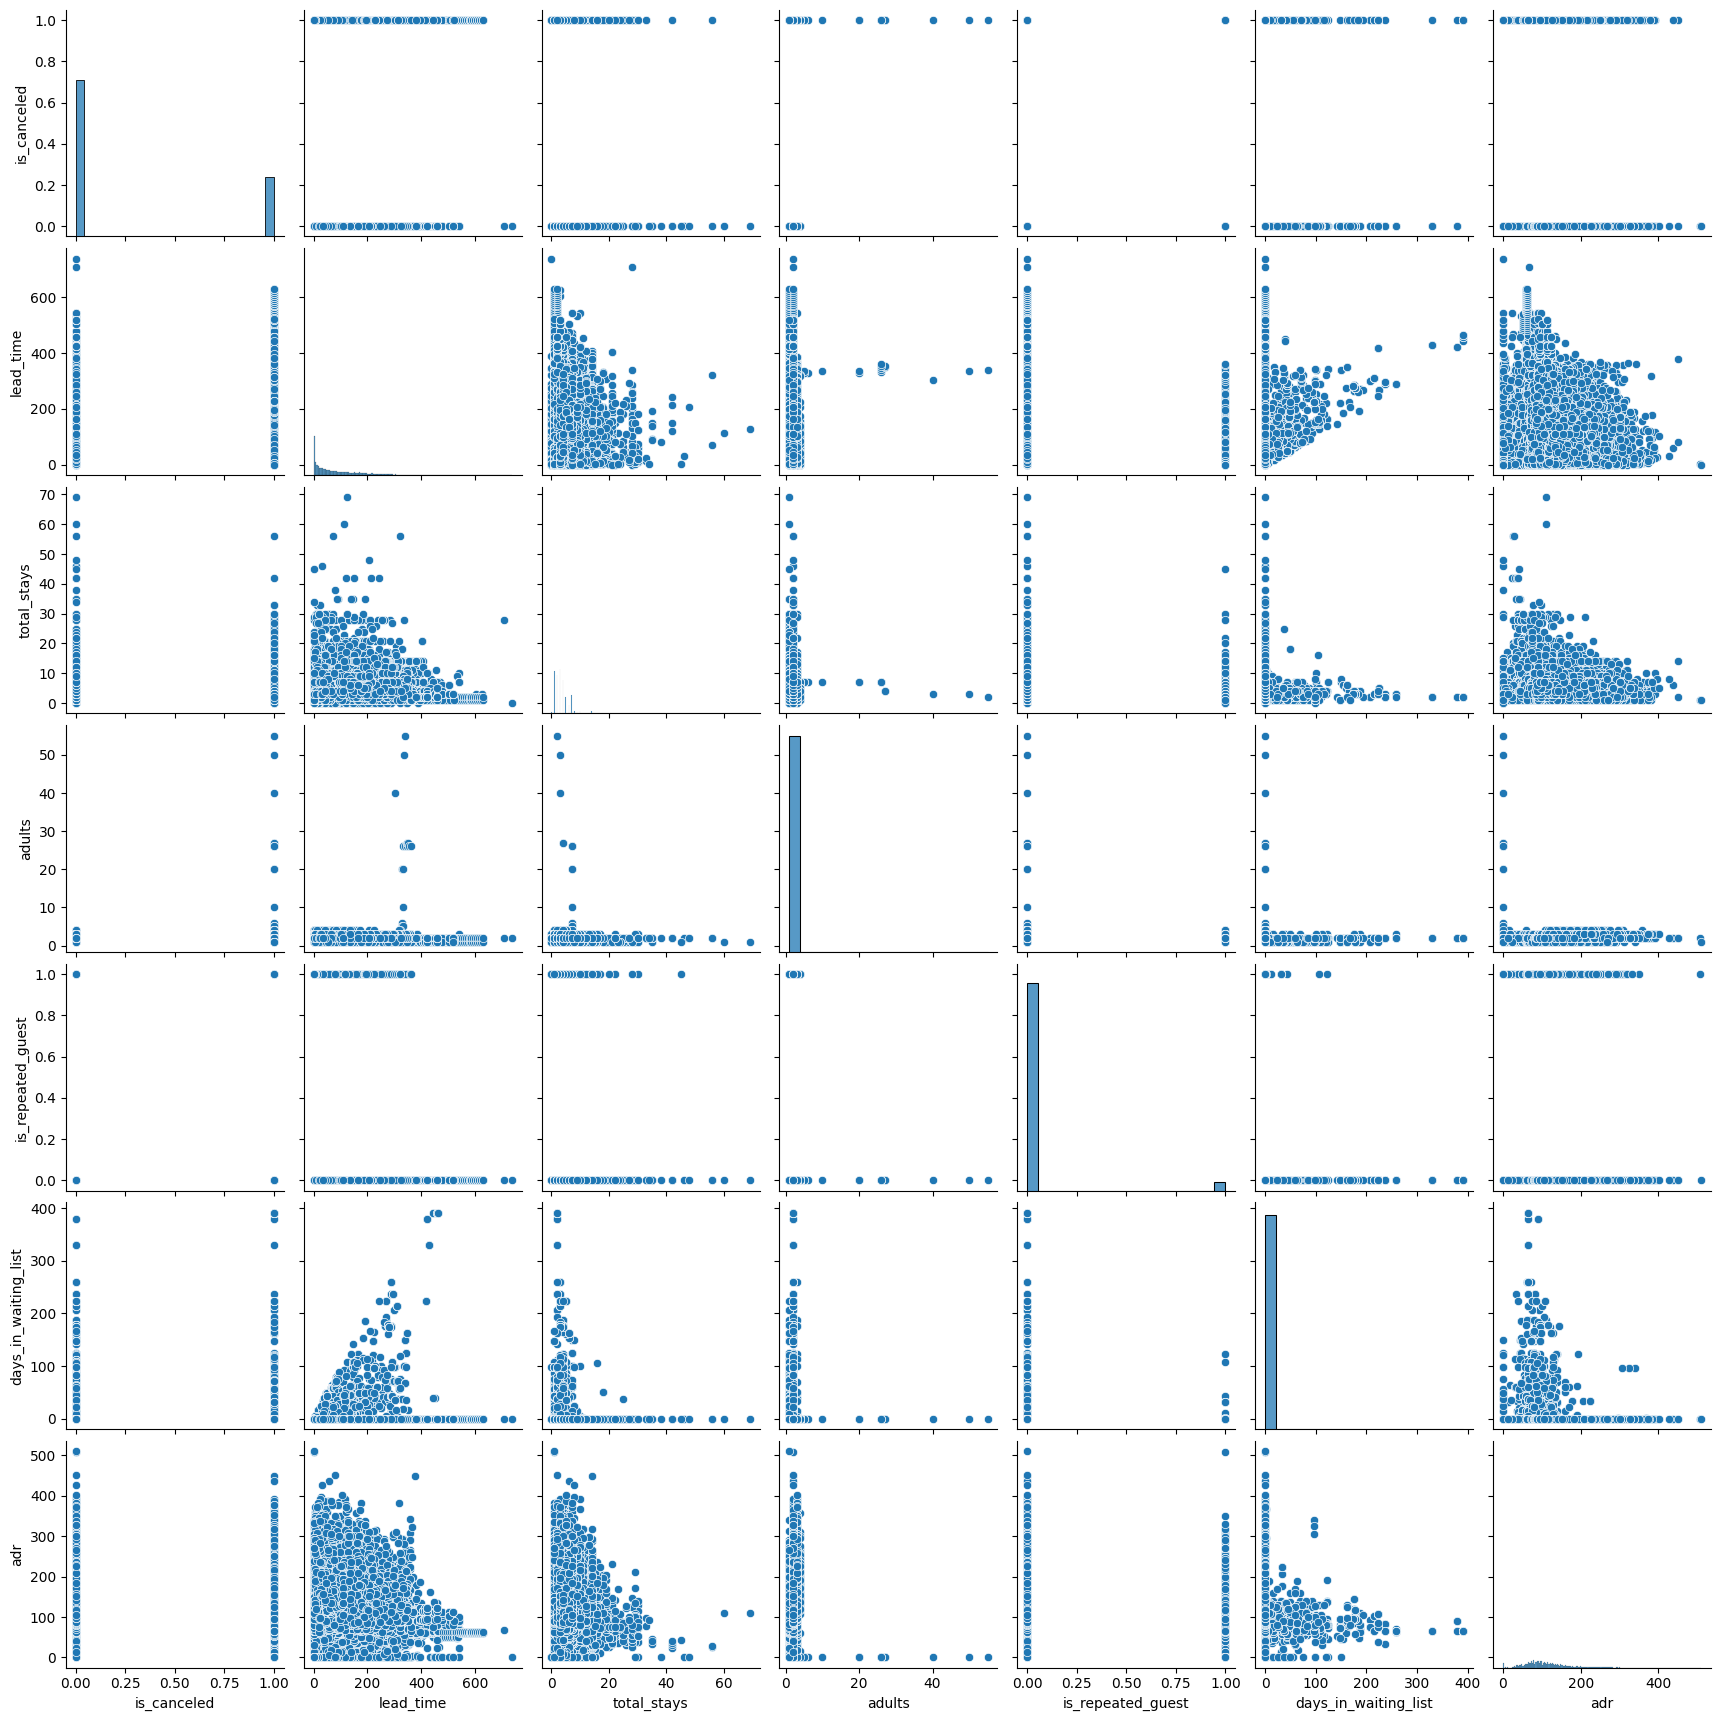

In [67]:
# Pair Plot visualization code
sns.pairplot(data=hotel[col])

##### 1. Why did you pick the specific chart?

Pair plot depicts Bivariate relationship bw the 2 col passed in the list

##### 2. What is/are the insight(s) found from the chart?

Scatter plot bw any two variables shows the given relation.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.


**Cancelling the cancellations**

As per the analysis, remedial measures to reduce cancellation rates are --

1. **Disallow advance booking of greater than 15 days** --as
for lead time greater than 15 days, cancellation rate increases to 30%. For lead time , less than 15 days cancellation rate is 15%

5. Introduce **Dynamic pricing** in peak business months of July & August.Give **additional discounts** in lean business season of Dec & Jan
4. **Overbook hotels** by deploying a suitable model to buffer against cancellations

Our **pricing strategy is competitive** , as ADR has no effect on cancellations

6. Occupancy & ADR of Week and weekday is same





---



---


**Untapped business opportunities**--

1. Incorporate Corporate & Aviation companies as customers, as their share in the mkt segment is less than 5% .Steps like -
  1. entering into half yearly contracts
  2. Corporate group trip stays
  3. employee family holiday packages etc

TAs share has already reached saturation levels.

2. **Increase customer retention** as repeated guests were as low as 4%.Measures like loyalty cards , cashbacks ,discounted next visits etc can be taken

3. **Tap overseas market** -- Maximum guests arrive from PRT.International market remains untapped.Leverage digital marketing , list our hotel on the local hotel booking apps of thhe respective overseas country



---



---


**Existing Pitfalls**

1.  **End Non refundable advance bookings**-- Non refundable deposits have 95% cancellation rate.It has not been able to stop cancellations  .Since non refundable bookings are also less in number ,it implies people hesitate to pay advance payments.



# **Conclusion**

After thorough analysis ,feasible recommendations are given keeping in mind the business objective.If these recommendations are followed , there are high chances of business growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***